# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [3]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:
# Your code here
def alpha_func(D, idx):
    sepal_width = D.loc[idx, 'Sepal.Width']
    sepal_length = D.loc[idx, 'Sepal.Length']
    
    alpha = sepal_width / sepal_length
    return alpha

Test the code below

In [5]:
alpha_func(df, range(100))

0     0.686275
1     0.612245
2     0.680851
3     0.673913
4     0.720000
        ...   
95    0.526316
96    0.508772
97    0.467742
98    0.490196
99    0.491228
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    0.566667
63    0.475410
51    0.500000
26    0.680000
30    0.645833
        ...   
62    0.366667
4     0.720000
8     0.659091
37    0.734694
83    0.450000
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

The average length of iris petals can fluctuate depending on the specific flowers we observe. Relying solely on one sample set may not accurately represent the typical petal length across all iris flowers. Bootstrapping assists in comprehending this variability by simulating numerous sample drawings from the population. This method sheds light on how the mean could vary and furnishes metrics such as standard error and confidence intervals. These metrics offer insights into the level of uncertainty surrounding our estimation, should we replicate the sampling procedure.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [7]:
# Add your code here to set the seed
def boot_SE(D, B=1000, seed =0):

    # 1. Initialize random number generator with seed
    rng = np.random.default_rng(seed)
    # 2. Initialize an empty list to store sample means
    sample_means = []
    bootstrap_samples = []
    # 3. Perform bootstrapping
    # B -- number of boostrapping
    for _ in range(B):
        # 4. Create indices for sample data with replacement
        idx = rng.choice(D.index,
                         size = D.shape[0],
                         replace=True)
        # 5. Draw a random sample with replacement from the data
        bootstrap_sample = D.loc[idx]
        bootstrap_samples.append(bootstrap_sample)

        # 6. Calculate mean for the bootstrap sample
        sample_mean = np.mean(bootstrap_sample)

        # 7. Store the mean values for each sample into a list
        sample_means.append(sample_mean)
    
    # 8. Calculate the standard error of bootstrap means and return the result

    return np.std(sample_means), sample_means, bootstrap_samples

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [8]:
# Your code here
B = 1000
seed = 0 
bootstrap_standard_errors, _, _ = boot_SE(df['Sepal.Length'],B,seed)

print("Original mean values of 'Sepal.Length':")
print(np.mean(df['Sepal.Length']))
print("Bootstrap Standard Errors:")
print(bootstrap_standard_errors)

Original mean values of 'Sepal.Length':
5.843333333333334
Bootstrap Standard Errors:
0.06649295592099295


_(vi)_ What is the original mean value of `Sepal.Length`?

5.843333333333334

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [9]:
# Add your code here
# Perform bootstrap with B = 1000
B = 1000
seed =0 
bootstrap_standard_errors, boostrap_mean_values, bootstrap_samples = boot_SE(df['Sepal.Length'], B, seed)

# 1. Review the bootstrapped range: 
t_range = np.ptp(bootstrap_samples)
print(f"The boostrapped range: {t_range}.")

# 2. Review the bootstrapped mean value and SE
# Calculate the standard deviation of the bootstrapped samples
print(f"Standard deviation of the bootstrapped samples: {bootstrap_standard_errors}")

# Calculate the mean of the bootstrapped samples
bootstrapped_mean = np.mean(boostrap_mean_values)
# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f"Bootstrapped mean value: {bootstrapped_mean}, and Original mean value of Sepal.Length: {original_mean_sepal_length}")

# 3. Compare the mean against its original value
# Compare the bootstrapped mean against the original mean value
print(f"Difference between bootstrapped mean and original mean: {bootstrapped_mean - original_mean_sepal_length}")

The boostrapped range: 3.6000000000000005.
Standard deviation of the bootstrapped samples: 0.06649295592099295
Bootstrapped mean value: 5.842284666666666, and Original mean value of Sepal.Length: 5.843333333333334
Difference between bootstrapped mean and original mean: -0.001048666666667586


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [20]:
# Add your code here
#  Compute 95% confidence intervals using the percentiles of bootstrapped samples
conf_int_95 = np.percentile(boostrap_mean_values, [2.5, 97])
print(f"95% Confidence Interval for the mean value of iris petal length: {conf_int_95}")

95% Confidence Interval for the mean value of iris petal length: [5.71861667 5.96870667]


In [11]:
min(df['Sepal.Length']), max(df['Sepal.Length'])

(4.3, 7.9)

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

Distribution of Bootstrapped Sample Means:

This histogram depicts the frequency of various average values (sample means) observed across multiple bootstrap samples. The tallest bar, concentrated between 5.84 and 5.86, signifies that this mean value occurred most frequently among all the sample means generated through bootstrapping.

Central Tendency and Variability:

The width of the histogram, spanning from 5.55 to 6.01, indicates the extent of variation in the estimated mean across different bootstrap samples. The tallest bar around 5.84 signifies where the most common estimate of the mean lies within this range, highlighting the central tendency of the data.

Shape:

While not perfect, the bell-shaped curve observed in the histogram suggests that the distribution of sample means approximates a normal distribution, particularly with a sample size of 150. This observation is significant for two reasons: it validates the principles of the Central Limit Theorem and demonstrates that bootstrapping yields dependable estimates of the population mean, reflecting the variability of these estimates around the true mean.

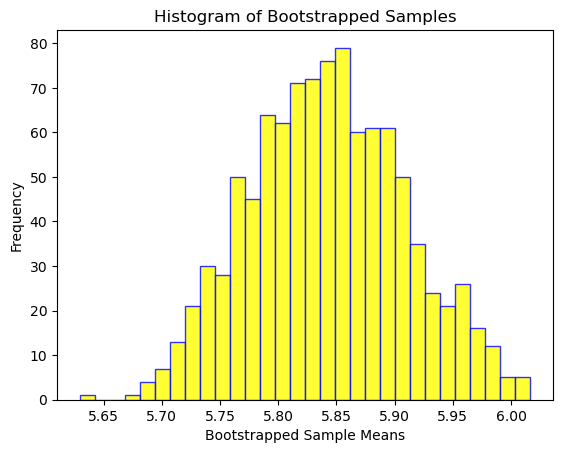

In [18]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boostrap_mean_values, bins=30, color='yellow', edgecolor='blue', linewidth=1, alpha=0.8)


# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Samples')


# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped Sample Means')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here


1. Based on the bootstrapped analysis, I suggest allocating approximately 5.84 cm for space management.

2. The close agreement between the original and bootstrapped means indicates the stability of the estimate.

3. Although the mean value of 5.84 cm provides a dependable estimate for most iris flowers, it's crucial to consider those with longer petal lengths.

4. The small standard deviation and narrow 95% confidence interval suggest minimal variability in the mean value, endorsing efficient space management in the shipment process.

5. It's recommended to periodically reassess with new data to uphold accuracy over time.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
